## Exercise 2a: Hard

Whilst the model for collecting data will get us what we want is a good start, it makes one big assumption: That the time segment we are in will remain the same for the whole journey.  More accurate results could be obtained if you keep track of the amount of time each bit of the journey takes.

For example, suppose you leave at 07:00, and the first segment is 16 minutes.  For the second segment, you should use the estimated time for 07:15.

You may assume that the entirety of the time on any one segment is the one you left in.  Should you wish to expand the model even further in some way you may do so, provided that you document it (good practice anyway!)

You should still use the other exercise sheet, but make sure you add `hard=True` as a parameter so you get all the data you need.

In [28]:
from magic import *
from datetime import datetime
from datetime import timedelta


def get_time_segment(string_time):
    """
    string_time should be 07:00 format
    """
    split_string_time = string_time.split(':')
    hours = split_string_time[0]
    minutes = int(split_string_time[1])
    #print("minutes: %d" % minutes)
    times = [0, 15, 30, 45]
    for i in range(0,4):
#         print(i)
        if minutes < times[i]:
            return '%s:%s' % (hours, str(times[i-1]))
    
    return '%s:%s' % (hours, '45')
            
def calculate_route_time(leaving_time, data):
    current_time = datetime.strptime(leaving_time.strip(), "%H:%M")
    segment = leaving_time
    total_time = 0
    #print("current_time", current_time)
    for i in range(1,14):
        route_times = data[segment]
        secs = route_times[i]
        total_time += secs    
        #print("total_time", total_time)
        current_time += timedelta(seconds=int(secs))
        #print("current_time", current_time)
        segment = get_time_segment(datetime.strftime(current_time, '%H:%M'))
        #print("segment", segment)
        if len(segment) == 4:
            segment += '0'

    #print('total_time', total_time)
    return total_time
    

def calculate_distribution(leaving_time):
    total_time_list = []
    for i in range(2012, 2015):
        for j in range(1, 12):            
            for k in range(1,8):
                month_data = get_data(1, i, j, leaving_time, hard=True)
                for d in month_data:
                    total_time = calculate_route_time(leaving_time, d)            
                    total_time_list.append(total_time + get_time_in_seconds('%s:00' % leaving_time))
    return total_time_list


(array([  49.,   98.,  161.,  273.,  203.,   98.,   56.,   35.,    7.,   14.]),
 array([ 30227.8  ,  30613.703,  30999.606,  31385.509,  31771.412,
         32157.315,  32543.218,  32929.121,  33315.024,  33700.927,
         34086.83 ]),
 <a list of 10 Patch objects>)

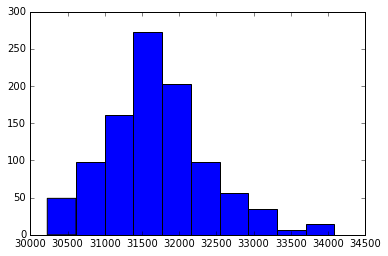

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
time = '07:30'
time = get_next_time(time)
plt.hist(np.asarray(calculate_distribution(time)))



